<a href="https://colab.research.google.com/github/Prajwal-Luitel/Heart-Failure-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libary

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset
### Link: https://huggingface.co/datasets/aai530-group6/heart-failure-prediction-dataset

In [34]:
!pip install huggingface_hub

In [35]:
df = pd.read_csv("hf://datasets/aai530-group6/heart-failure-prediction-dataset/heart.csv")

In [36]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory Data Analysis (EDA)

In [37]:
categorical_columns =  df.select_dtypes(include=['object']).columns.to_list()+['FastingBS', 'HeartDisease'] # Concatening the list
numerical_columns = df.drop(columns=['FastingBS', 'HeartDisease']).select_dtypes(exclude=['object']).columns.to_list()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Correlation Heatmap

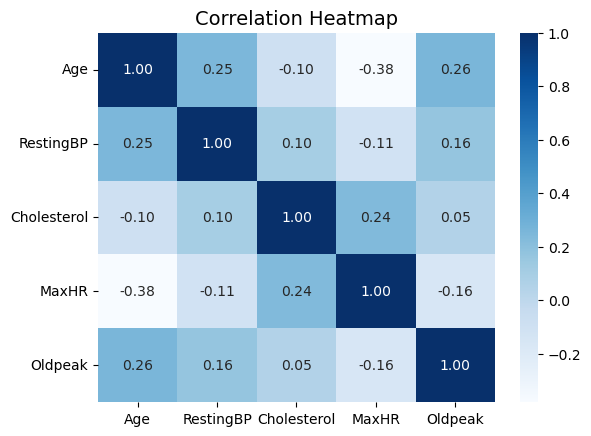

In [39]:
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

## Boxplot
### All numerical columns

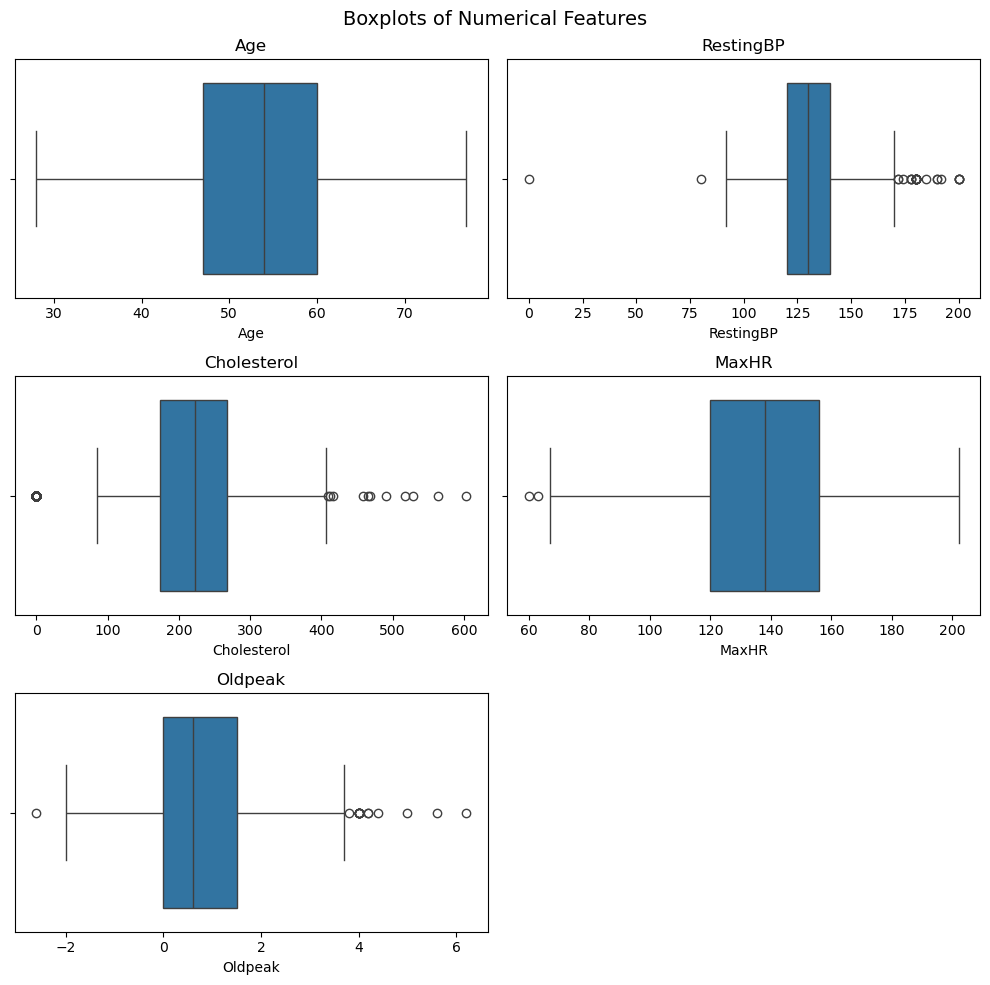

In [40]:
n = len(numerical_columns)
plt.figure(figsize=(10,10))
for i in range(n):
    plt.subplot(3,2,i+1)
    sns.boxplot(df[numerical_columns[i]], orient='h')
    plt.title(numerical_columns[i])
plt.suptitle("Boxplots of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

## Histogram
### All columns

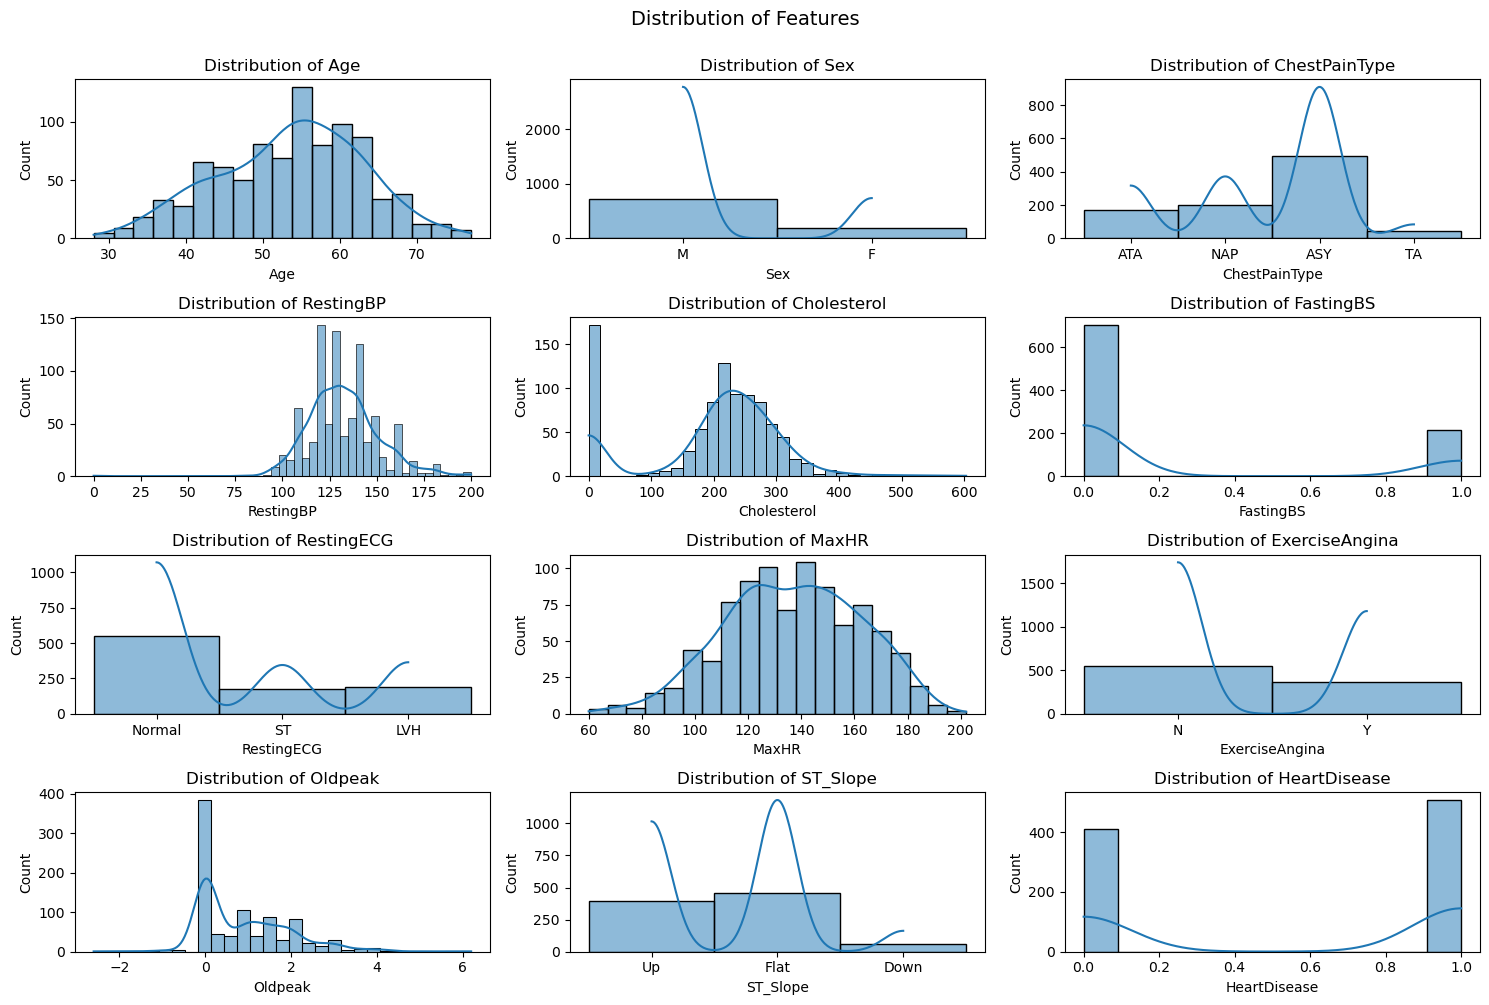

In [41]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
plt.suptitle("Distribution of Features", y=1, fontsize=14)
plt.tight_layout()
plt.show()

## Pairplot
### Pairplot of features by heart disease

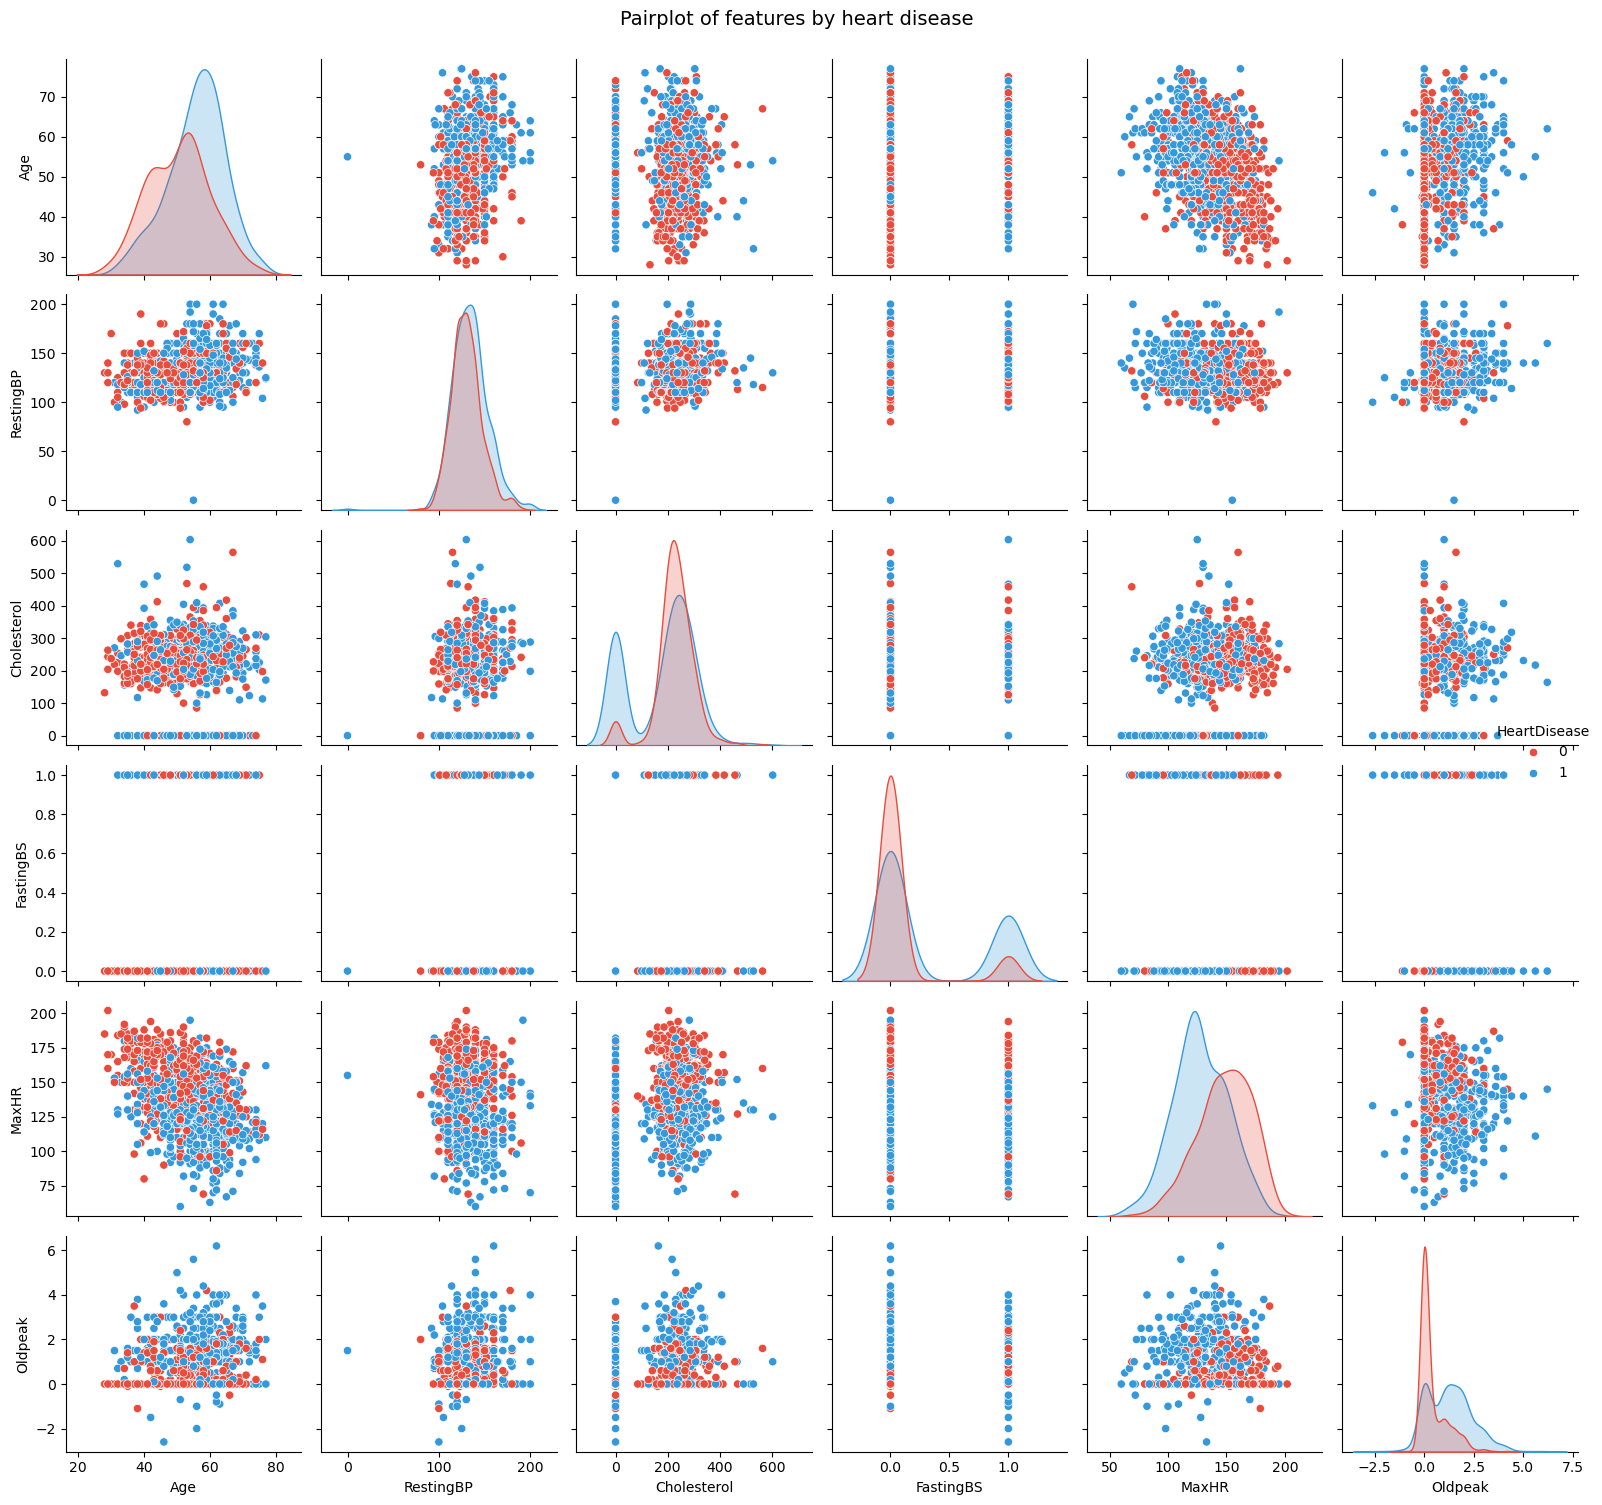

In [42]:
sns.pairplot(df,hue="HeartDisease", palette={0: "#e74c3c", 1: "#3498db"})
plt.suptitle("Pairplot of features by heart disease", y=1, fontsize=14)
plt.tight_layout()
plt.show()

## Bar Graph
### categorical column vs heart disease

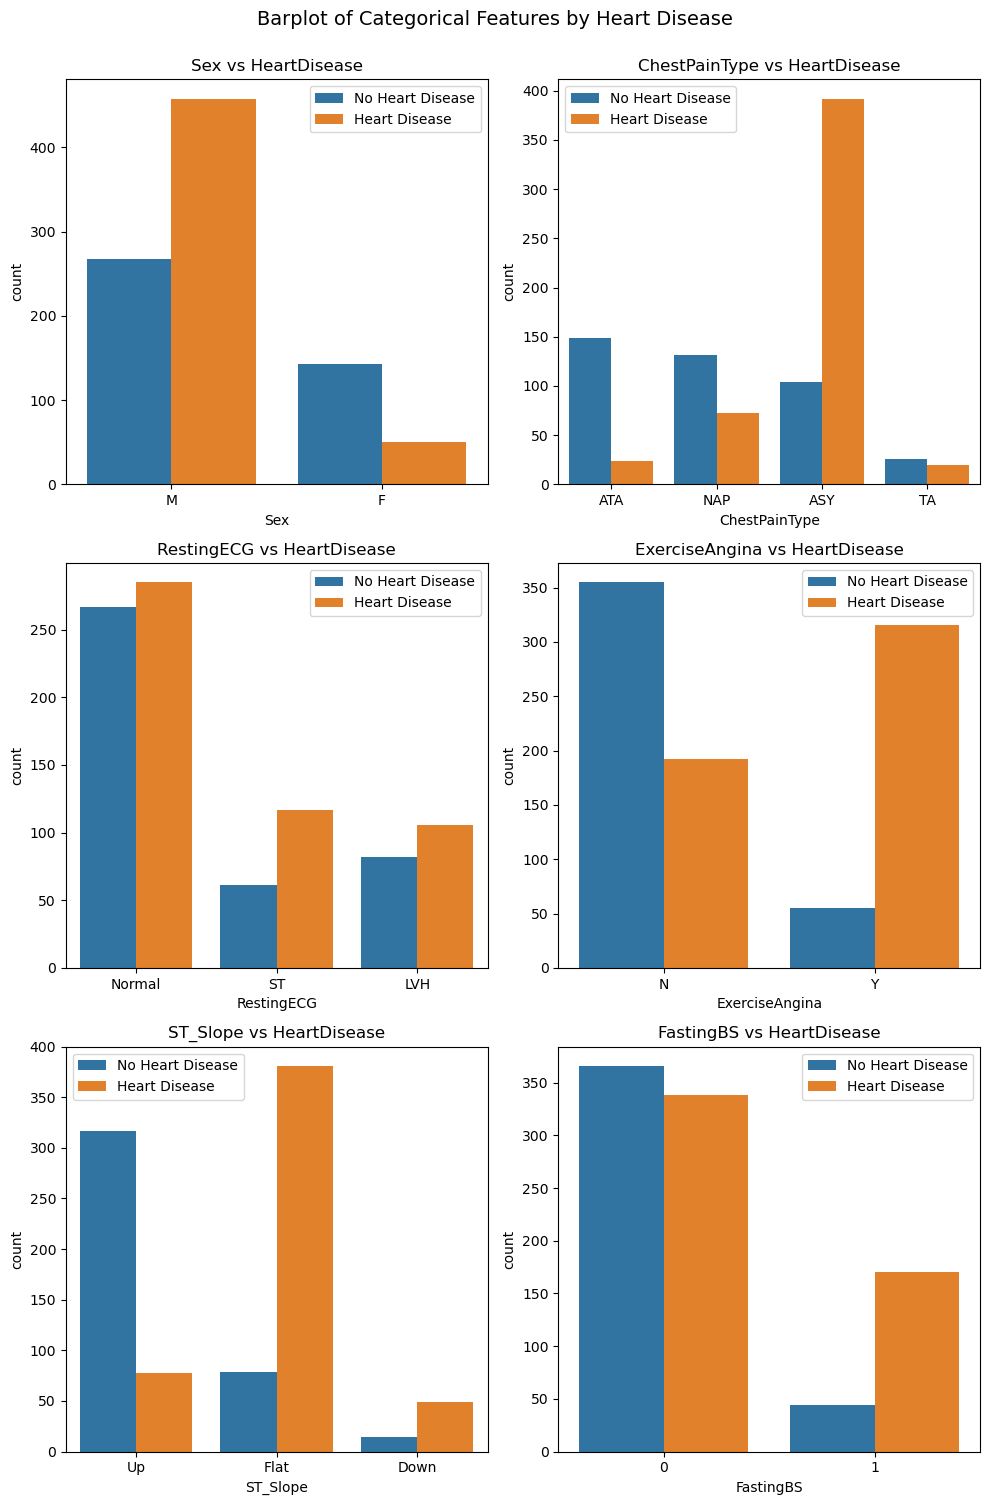

In [43]:
n = len(categorical_columns)
plt.figure(figsize=(10,15))
row = int(np.floor(n / 2))

for i in range(n-1):
    plt.subplot(row, 2, i+1)
    sns.countplot(data = df, x=categorical_columns[i] ,hue = "HeartDisease")
    plt.title(f"{categorical_columns[i]} vs HeartDisease")
    plt.legend(['No Heart Disease','Heart Disease'])
plt.suptitle("Barplot of Categorical Features by Heart Disease", y=1, fontsize=14)
plt.tight_layout()
plt.show()

# Feature Engineering

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [45]:
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}")

X_train shape: (688, 11)
X_test shape: (230, 11)


## One Hot Encoding

In [46]:
from sklearn.preprocessing import OneHotEncoder

oe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first',dtype=np.int32)


In [47]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

In [48]:
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ('one_hot_encoding', oe, categorical_columns[:-2]),
        ('robust_scaler', robust_scaler, numerical_columns),
        ],
    n_jobs=-1, 
)
preprocess.set_output(transform="pandas")

ColumnTransformer(n_jobs=-1,
                  transformers=[('one_hot_encoding',
                                 OneHotEncoder(drop='first',
                                               dtype=<class 'numpy.int32'>,
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope']),
                                ('robust_scaler', RobustScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR',
                                  'Oldpeak'])])

In [49]:
X_train = preprocess.fit_transform(X_train)
X_test  = preprocess.transform(X_test)

In [50]:
X_train

,one_hot_encoding__Sex_M,one_hot_encoding__ChestPainType_ATA,one_hot_encoding__ChestPainType_NAP,one_hot_encoding__ChestPainType_TA,one_hot_encoding__RestingECG_Normal,one_hot_encoding__RestingECG_ST,one_hot_encoding__ExerciseAngina_Y,one_hot_encoding__ST_Slope_Flat,one_hot_encoding__ST_Slope_Up,robust_scaler__Age,robust_scaler__RestingBP,robust_scaler__Cholesterol,robust_scaler__MaxHR,robust_scaler__Oldpeak
637,1,0,0,0,1,0,0,1,0,-0.923077,-0.714286,0.887640,1.131579,0.466667
541,1,0,1,0,0,0,0,0,0,1.615385,-1.238095,-1.247191,-0.473684,2.000000
570,1,0,0,0,0,1,1,0,0,0.076923,-0.095238,-0.011236,-0.500000,1.000000
611,1,0,0,1,0,1,0,0,1,0.538462,0.238095,-0.955056,-0.026316,-0.200000
685,1,0,0,0,1,0,1,1,0,0.461538,-0.476190,0.404494,0.052632,2.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1,0,0,0,1,0,0,1,0,0.615385,-1.428571,-2.516854,-0.763158,-0.933333
315,1,1,0,0,0,1,0,0,1,1.461538,0.714286,-2.516854,-0.394737,0.533333
819,1,0,0,0,0,0,1,1,0,0.000000,1.428571,0.730337,0.184211,0.200000
355,1,0,0,1,0,0,0,1,0,0.923077,0.714286,-2.516854,-0.342105,-0.333333


## Boxplot
### Before and After Robust Scaling

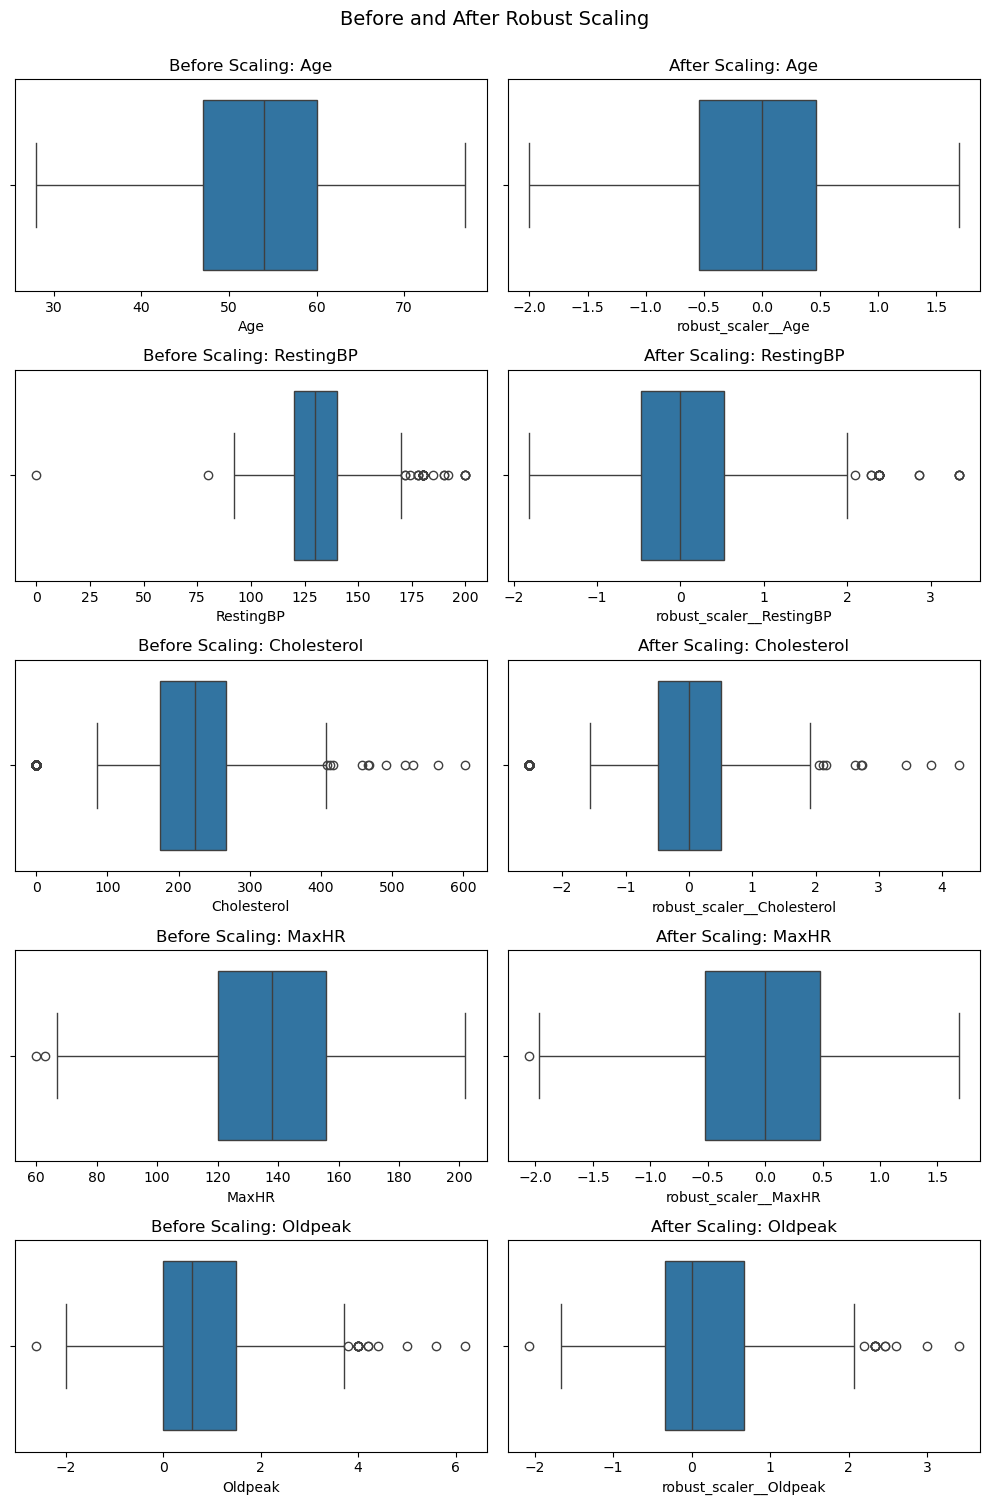

In [51]:
n = len(numerical_columns)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 15))
scaled_columns = X_train.columns[-len(numerical_columns):]

for i in range(n):
    ax = axes[i,0]
    sns.boxplot(df[numerical_columns[i]], ax=axes[i,0], orient='h')
    axes[i,0].set_title(f"Before Scaling: {numerical_columns[i]}")
    sns.boxplot(X_train[scaled_columns[i]], ax=axes[i,1], orient='h')
    axes[i,1].set_title(f"After Scaling: {numerical_columns[i]}")

plt.suptitle("Before and After Robust Scaling", y=1, fontsize=14)
plt.tight_layout()
plt.show()

# Default Model

## Evaluation Function

In [52]:
from sklearn.compose import ColumnTransformer
from IPython.display import display
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate


preprocess = ColumnTransformer(
    transformers=[
        ("one_hot_encoding", oe, categorical_columns[:-2]),
        ("robust_scaler", robust_scaler, numerical_columns),
    ],
    n_jobs=-1,
)

result_df = pd.DataFrame(
    columns=["model name", "accuracy", "precision", "recall", "f1"]
)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def display_cross_val_score(model, title=""):
    # Note the model is already fitted so need to created a deep copy of the model to fit again
    base_model = clone(model)
    pipe = Pipeline([("preprocess", preprocess), ("model", base_model)])

    val_score = cross_validate(
        pipe, X, y, scoring=["accuracy", "precision", "recall", "f1"], cv=cv, n_jobs=-1
    )
    
    accuracy = np.round(np.mean(val_score["test_accuracy"]), decimals=3)
    precision = np.round(np.mean(val_score["test_precision"]), decimals=3)
    recall = np.round(np.mean(val_score["test_recall"]), decimals=3)
    f1 = np.round(np.mean(val_score["test_f1"]), decimals=3)

    result_df.loc[len(result_df)] = [title, accuracy, precision, recall, f1]
    # Display the table even when it is not the last execution in cell
    display(result_df.tail(1).style.hide(axis="index"))

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Confusion Matrix
def display_confusion_matrix(y_test, y_pred, title=""):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {title}")
    plt.show()


# ROC AUC Curve
def display_ROC(y_test, y_prob, title=""):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {title}")
    plt.legend()
    plt.grid(True)
    plt.show()


# Precision-Recall Curve
def display_precision_recall(y_test, y_prob, title=""):
    # Compute precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    # Compute Average Precision (AP) score
    ap_score = average_precision_score(y_test, y_prob)
    # Plot
    plt.plot(recall, precision, label=f"PR curve (AP = {ap_score:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {title}")
    plt.legend()
    plt.grid(True)
    plt.show()


def generate_evaluation(model, title=""):
    print(f"{title} Model evaluated on Stratified Fold dataset:-")
    display_cross_val_score(model, title=title)
    print()
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"{title} Model evaluated on test dataset:-\n")
    print(classification_report(y_test, y_pred) + "\n")
    display_confusion_matrix(y_test, y_pred, title)
    display_ROC(y_test, y_prob, title)
    display_precision_recall(y_test, y_prob, title)

## Logistic Regression

### Model Training

In [54]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42, n_jobs=-1)
logistic_regression.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

### Model Evaluation

Logistic Regression Model evaluated on Stratified Fold dataset:-


model name,accuracy,precision,recall,f1
Logistic Regression,0.857000,0.863000,0.884000,0.873000



Logistic Regression Model evaluated on test dataset:-

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       103
           1       0.88      0.91      0.90       127

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230




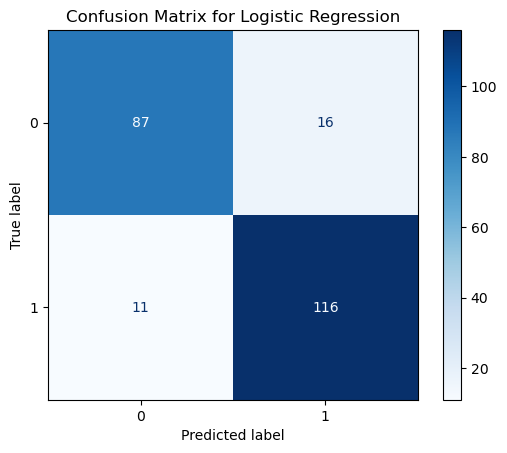

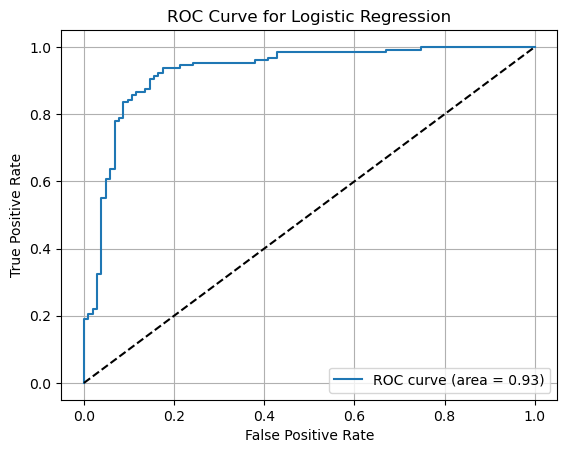

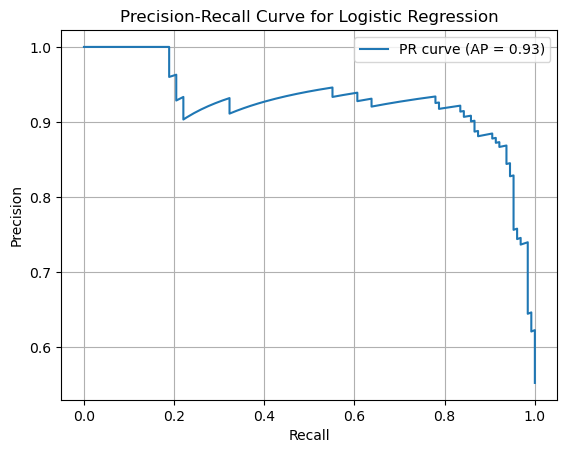

In [55]:
generate_evaluation(logistic_regression, title="Logistic Regression")

## Decision Tree

### Model Training

In [56]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation

Decision Tree Model evaluated on Stratified Fold dataset:-


model name,accuracy,precision,recall,f1
Decision Tree,0.766000,0.788000,0.789000,0.788000



Decision Tree Model evaluated on test dataset:-

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       103
           1       0.85      0.82      0.83       127

    accuracy                           0.82       230
   macro avg       0.82      0.82      0.82       230
weighted avg       0.82      0.82      0.82       230




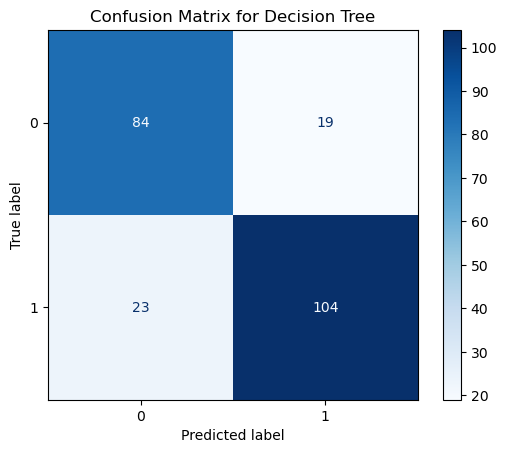

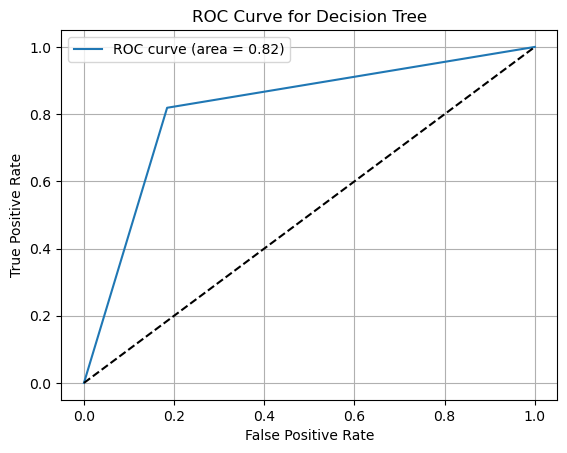

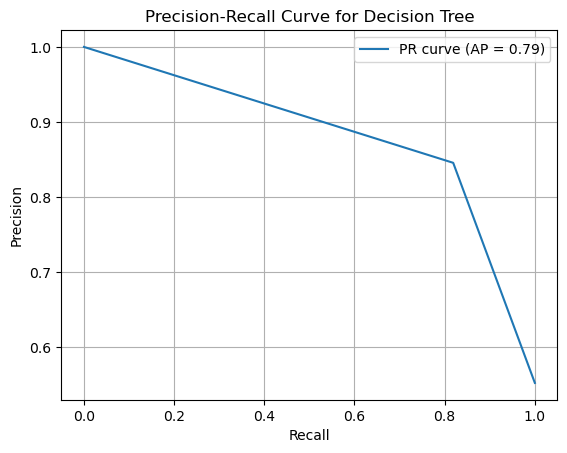

In [57]:
generate_evaluation(decision_tree, title="Decision Tree")

## XGBoost

### Model Training

In [58]:
!pip install xgboost

In [59]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(random_state=42, n_jobs=-1)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, ...)

### Model Evaluation

XGBoost Model evaluated on Stratified Fold dataset:-


model name,accuracy,precision,recall,f1
XGBoost,0.849000,0.848000,0.888000,0.866000



XGBoost Model evaluated on test dataset:-

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       103
           1       0.89      0.87      0.88       127

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230




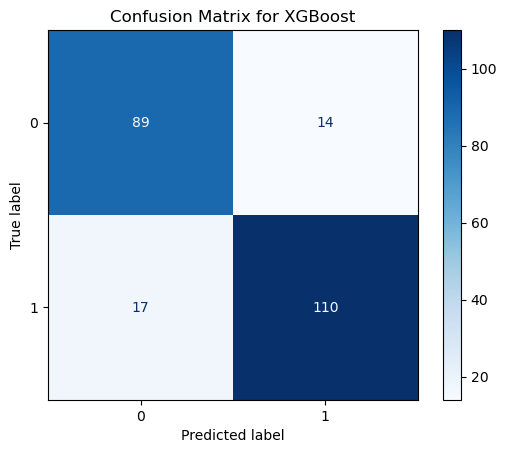

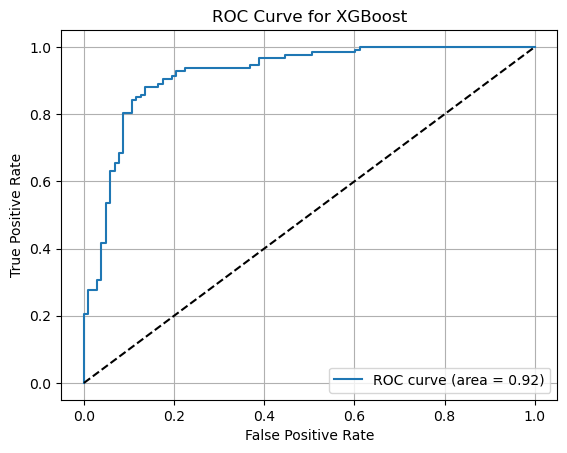

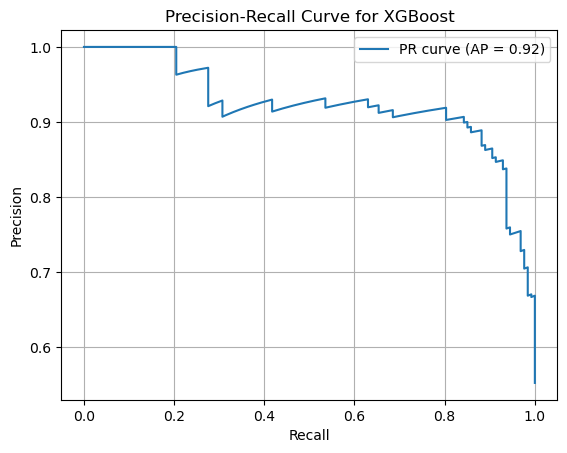

In [60]:
generate_evaluation(xgboost, title="XGBoost")


# Hyperparameter Tunning

In [61]:
from sklearn.model_selection import GridSearchCV

## Logistic Regression

### Model Tunning

In [62]:
param_grid = [
    {
        'solver': ['lbfgs'],
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10],
    },
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10]
    },
    {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'l1_ratio': [0.2, 0.5, 0.8]
    }
]

lr = LogisticRegression(random_state=42, class_weight='balanced')

lr_grid = GridSearchCV(estimator = lr,
                       param_grid = param_grid,
                       scoring = 'recall',
                       cv = 5,
                       verbose=2)


In [63]:
lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2,

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                          'solver': ['lbfgs']},
                         {'C': [0.001, 0.01, 0.1, 1, 10],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10],
                          'l1_ratio': [0.2, 0.5, 0.8],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='recall', verbose=2)

In [64]:
lr_grid.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [65]:
lr_grid.best_score_

0.8688995215311005

### Model Training

In [66]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(**lr_grid.best_params_, random_state=42)
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.001, random_state=42, solver='liblinear')

### Model Evaluation

Tuned Logistic Regression Model evaluated on Stratified Fold dataset:-


model name,accuracy,precision,recall,f1
Tuned Logistic Regression,0.832000,0.834000,0.872000,0.852000



Tuned Logistic Regression Model evaluated on test dataset:-

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       103
           1       0.87      0.89      0.88       127

    accuracy                           0.87       230
   macro avg       0.86      0.86      0.86       230
weighted avg       0.87      0.87      0.87       230




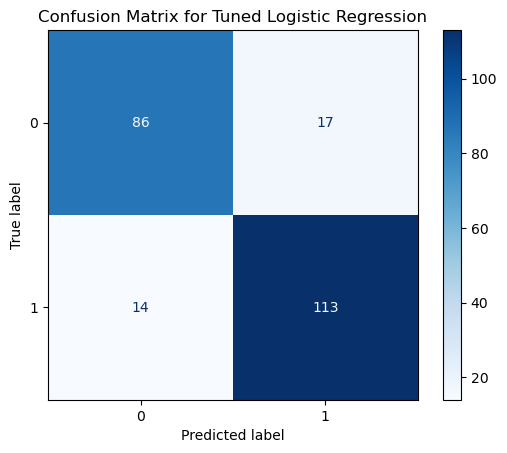

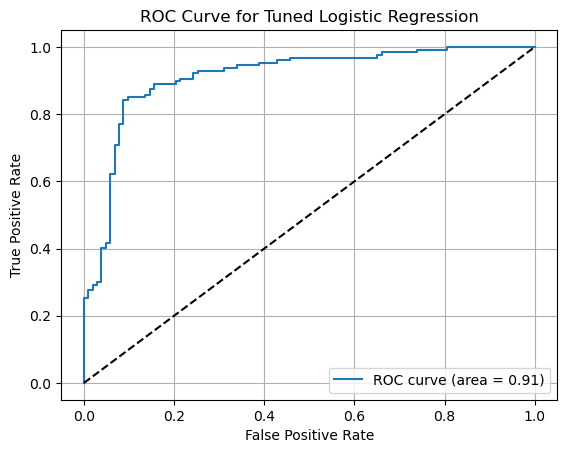

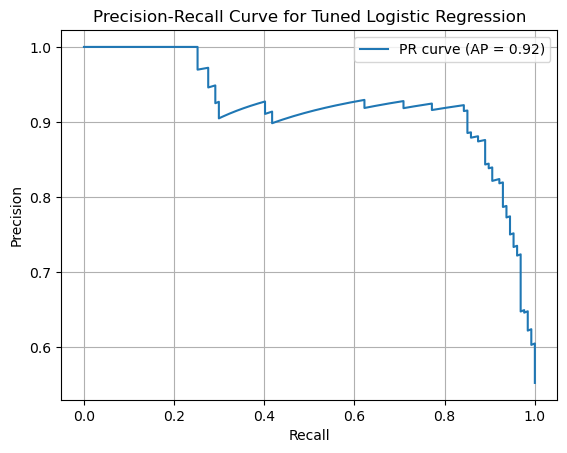

In [67]:
generate_evaluation(lr_grid.best_estimator_, title="Tuned Logistic Regression")

## Decision Tree

### Model Tunning

In [68]:
param_grid = {
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [2, 3, 5, 10],
    'max_features': [None, 0.25, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

dt = DecisionTreeClassifier(random_state=42)

dt_grid = GridSearchCV(estimator = dt,
                       param_grid = param_grid,
                       scoring = 'recall',
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)


In [69]:
dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 30],
                         'max_features': [None, 0.25, 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5, 10],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='recall', verbose=2)

In [70]:
dt_grid.best_params_

{'class_weight': None,
 'max_depth': 10,
 'max_features': 0.25,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [71]:
dt_grid.best_score_

0.8766575529733425

### Model Training

In [72]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(**dt_grid.best_params_, random_state=42)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.25, min_samples_leaf=5,
                       random_state=42)

### Model Evaluation

Tuned Decision Tree Model evaluated on Stratified Fold dataset:-


model name,accuracy,precision,recall,f1
Tuned Decision Tree,0.783000,0.807000,0.807000,0.805000



Tuned Decision Tree Model evaluated on test dataset:-

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       103
           1       0.83      0.83      0.83       127

    accuracy                           0.81       230
   macro avg       0.81      0.81      0.81       230
weighted avg       0.81      0.81      0.81       230




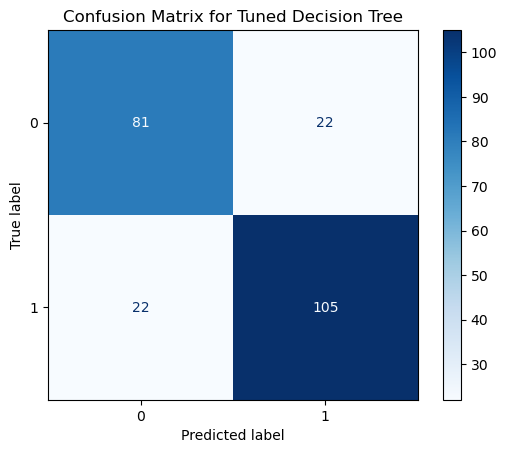

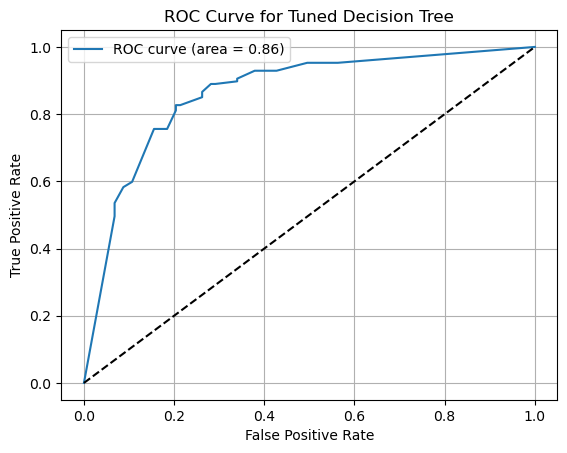

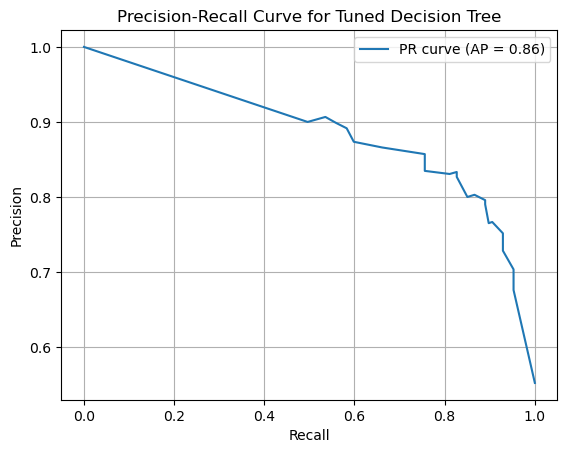

In [73]:
generate_evaluation(decision_tree, title="Tuned Decision Tree")

## XGBoost

### Model Tunning

In [74]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 2,  5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

xg = XGBClassifier(random_state=42)

xg_grid = GridSearchCV(estimator = xg,
                       param_grid = param_grid,
                       scoring = 'recall',
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)


In [75]:
xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 2, 5, 10],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='recall', verbose=2)

In [76]:
xg_grid.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': None,
 'min_child_weight': 10,
 'n_estimators': 200,
 'subsample': 1.0}

In [77]:
xg_grid.best_score_

0.910868079289132

### Model Training

In [78]:
xgboost = XGBClassifier(**xg_grid.best_params_, random_state=42, n_jobs=-1)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=None, ...)

### Model Evaluation

Tuned XGBoost Model evaluated on Stratified Fold dataset:-


model name,accuracy,precision,recall,f1
Tuned XGBoost,0.849000,0.833000,0.910000,0.869000



Tuned XGBoost Model evaluated on test dataset:-

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       103
           1       0.84      0.93      0.88       127

    accuracy                           0.87       230
   macro avg       0.87      0.86      0.86       230
weighted avg       0.87      0.87      0.86       230




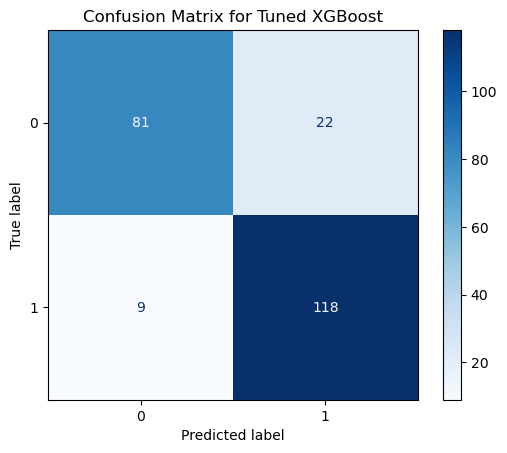

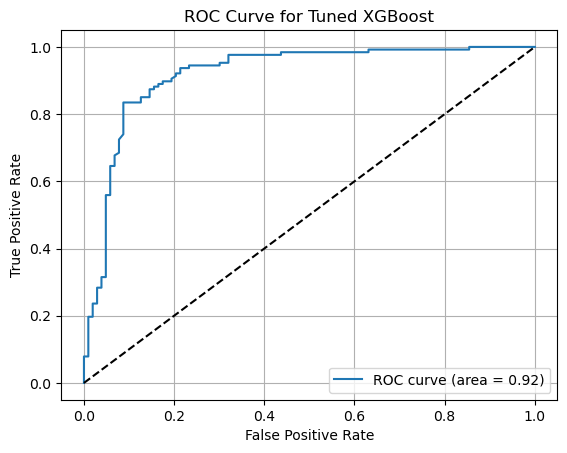

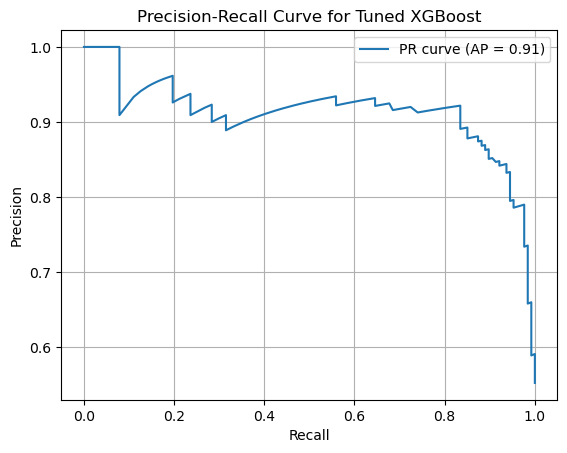

In [79]:
generate_evaluation(xgboost, title="Tuned XGBoost")

## Stacking base model with AdaBoost

In [80]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

estimators = [
    ('lr', lr_grid.best_estimator_),
    ('dt', dt_grid.best_estimator_),
    ('xgb', xg_grid.best_estimator_)
]

stacking = StackingClassifier(
    estimators=estimators, 
    final_estimator= AdaBoostClassifier(random_state=42, algorithm='SAMME'),
    stack_method='predict_proba',
    cv=5,
    n_jobs=-1
)

stacking.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=0.001,
                                                   class_weight='balanced',
                                                   random_state=42,
                                                   solver='liblinear')),
                               ('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       max_features=0.25,
                                                       min_samples_leaf=5,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_byt...
                                              learning_rate=0.01, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=10, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=AdaBoostClassifier(algorithm='SAMME',
                                                      random_state=42),
                   n_jobs=-1, stack_method='predict_proba')

### Model Evaluation

Stacking Model evaluated on Stratified Fold dataset:-


model name,accuracy,precision,recall,f1
Stacking,0.827000,0.812000,0.896000,0.850000



Stacking Model evaluated on test dataset:-

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       103
           1       0.88      0.90      0.89       127

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230




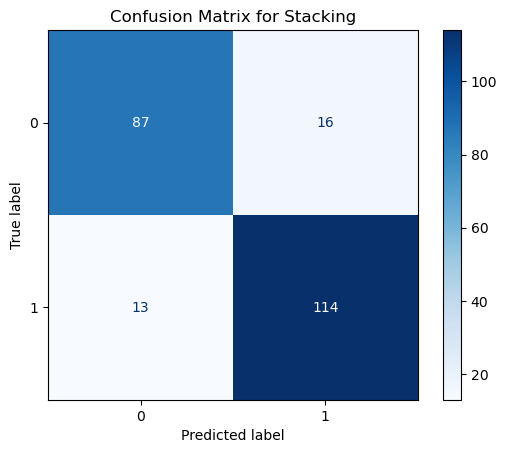

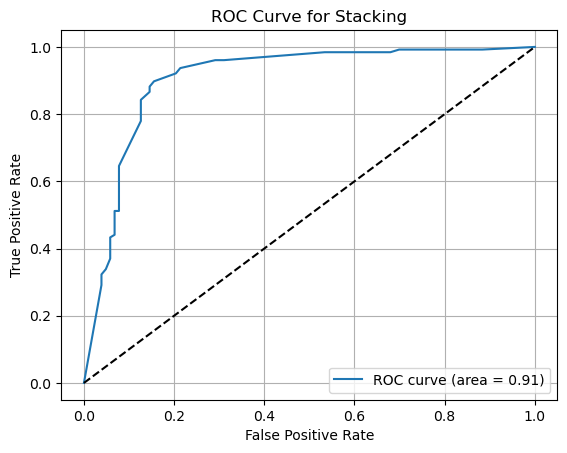

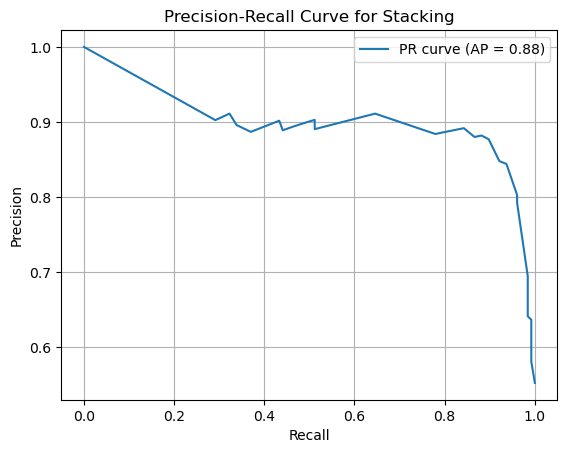

In [81]:
generate_evaluation(stacking, title="Stacking")

## Hyperparameter tunning the meta model



In [82]:
param_grid = {
    'final_estimator__n_estimators': [50, 75, 90, 100, 125, 150, 200],
    'final_estimator__learning_rate': [0.01, 0.03, 0.05, 0.1, 1]
}

stack_grid = GridSearchCV(estimator=stacking,
                          param_grid=param_grid,
                          scoring = 'recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=2)

stack_grid.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5,
             estimator=StackingClassifier(cv=5,
                                          estimators=[('lr',
                                                       LogisticRegression(C=0.001,
                                                                          class_weight='balanced',
                                                                          random_state=42,
                                                                          solver='liblinear')),
                                                      ('dt',
                                                       DecisionTreeClassifier(max_depth=10,
                                                                              max_features=0.25,
                                                                              min_samples_leaf=5,
                                                                              random_state=42)),
                                                      ('xgb',
                                                       XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsamp...
                                                                     multi_strategy=None,
                                                                     n_estimators=200,
                                                                     n_jobs=None,
                                                                     num_parallel_tree=None, ...))],
                                          final_estimator=AdaBoostClassifier(algorithm='SAMME',
                                                                             random_state=42),
                                          n_jobs=-1,
                                          stack_method='predict_proba'),
             n_jobs=-1,
             param_grid={'final_estimator__learning_rate': [0.01, 0.03, 0.05,
                                                            0.1, 1],
                         'final_estimator__n_estimators': [50, 75, 90, 100, 125,
                                                           150, 200]},
             scoring='recall', verbose=2)

In [83]:
stack_grid.best_params_

{'final_estimator__learning_rate': 0.03, 'final_estimator__n_estimators': 100}

In [84]:
stack_grid.best_score_

0.9030758714969241

## Model Evaluation

Tuned Stacking Model evaluated on Stratified Fold dataset:-


model name,accuracy,precision,recall,f1
Tuned Stacking,0.850000,0.828000,0.921000,0.872000



Tuned Stacking Model evaluated on test dataset:-

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       103
           1       0.86      0.92      0.89       127

    accuracy                           0.87       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230




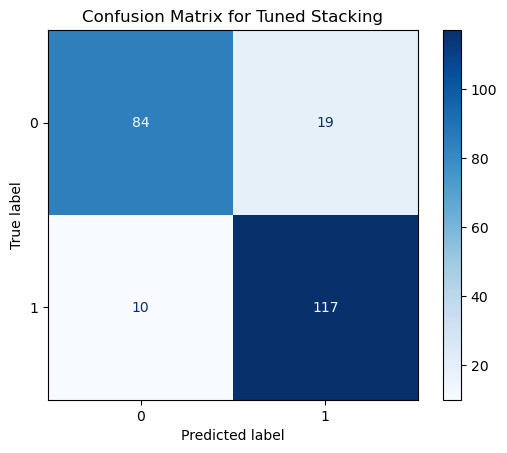

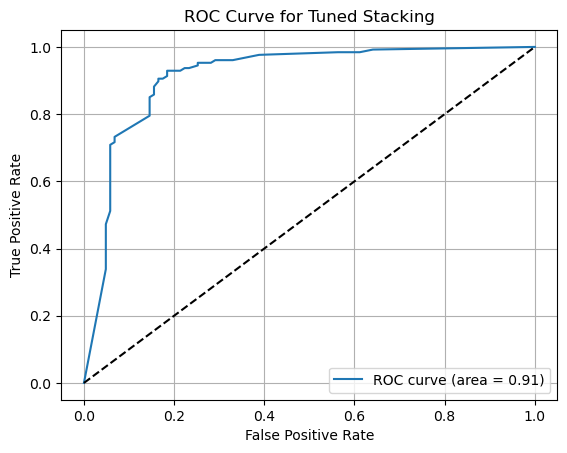

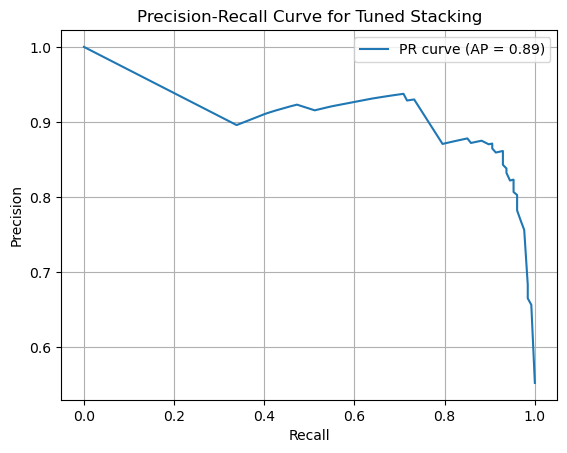

In [85]:
generate_evaluation(stack_grid.best_estimator_, title="Tuned Stacking")

In [86]:
result_df = result_df.sort_values(by='recall', ascending=False).reset_index(drop=True)
result_df

,model name,accuracy,precision,recall,f1
0,Tuned Stacking,0.850,0.828,0.921,0.872
1,Tuned XGBoost,0.849,0.833,0.910,0.869
2,Stacking,0.827,0.812,0.896,0.850
3,XGBoost,0.849,0.848,0.888,0.866
4,Logistic Regression,0.857,0.863,0.884,0.873
5,Tuned Logistic Regression,0.832,0.834,0.872,0.852
6,Tuned Decision Tree,0.783,0.807,0.807,0.805
7,Decision Tree,0.766,0.788,0.789,0.788


In [87]:
def labels(ax):
    for container in ax.containers:
        ax.bar_label(container, labels=[f"{v * 100:.2f}" for v in container.datavalues], padding=3)                   
    
def generate_performance_bar(df, title="Model Performance Comparison"):
    metrics = ['recall', 'precision', 'f1', 'accuracy']

    fig, axs = plt.subplots(4, 1, figsize=(14, 14))

    for i, metric in enumerate(metrics):
        df = df.sort_values(by=metric, ascending=False)
        ax = sns.barplot(x=metric, y="model name", hue="model name", legend=False, data=df, palette="Blues_d", ax=axs[i])
        ax.set_xlabel("")
        ax.set_title(metric.capitalize())
        labels(ax)
    plt.suptitle(title, y=1)        
    plt.tight_layout()
    plt.show()
    

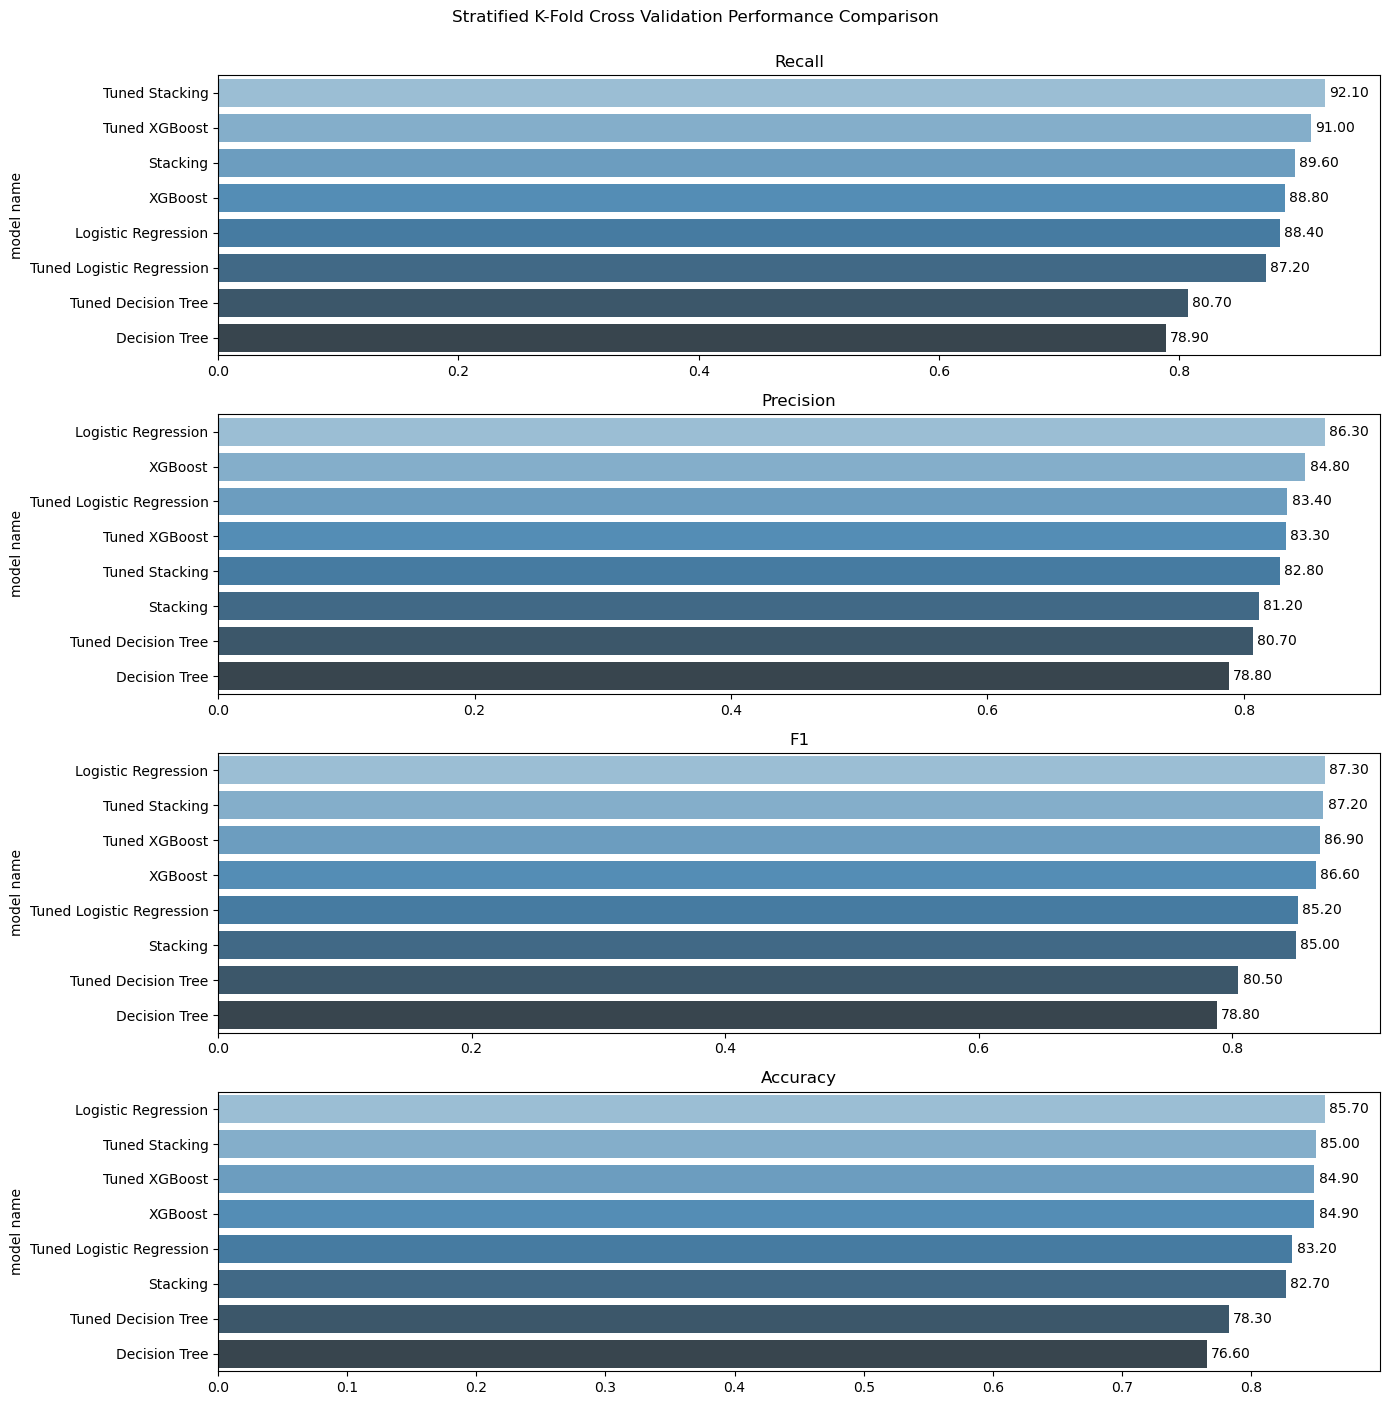

In [88]:
generate_performance_bar(result_df, title="Stratified K-Fold Cross Validation Performance Comparison")